9/13/18 Data exploration Part 2 for Etsy dataset from http://vision.is.tohoku.ac.jp/~kyamagu/research/etsy-dataset/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
from glob import glob

In [2]:
cd ~/Documents/Insight/Etsy/180912_1st_Exploratory_Data_Analysis/

/home/mc/Documents/Insight/Etsy/180912_1st_Exploratory_Data_Analysis


In [3]:
with open('categories.json', 'r') as categories_file:
    categories = json.load(categories_file)

#For Testing a single file
#with open('listings/0000.json', 'r') as listings_file:
#    listings = json.load(listings_file)

### This will open all JSON files
#for json_file in sorted(glob('listings/*.json')):
#    with open(json_file, 'r') as listings_file:
#        listings = json.load(listings_file)
#        print(json_file)

In [18]:
top_level_category_ids = []
top_level_category_names = []
for i in categories:
    if i['parent'] == None:
        print(i['long_name'], i['category_id'])
        top_level_categories.append(i['category_id'])
        top_level_category_names.append(i['long_name'])

Art 68887312
Bath and Beauty 68887336
Plants and Edibles 68887346
Holidays 68887366
Woodworking 68887388
Knitting 68887400
Needlecraft 68887406
Everything Else 68887416
Furniture 68887430
Pets 68887434
Music 68887460
Jewelry 68887482
Patterns 68887486
Weddings 68887494
Quilts 68887502
Crochet 69150341
Clothing 69150353
Geekery 69150359
Glass 69150361
Paper Goods 69150367
Candles 69150375
Books and Zines 69150385
Toys 69150393
Children 69150405
Dolls and Miniatures 69150415
Housewares 69150425
Supplies 69150433
Vintage 69150437
Ceramics and Pottery 69150451
Bags and Purses 69150455
Accessories 69150467


In [17]:
print(top_level_categories)

[68887312, 68887336, 68887346, 68887366, 68887388, 68887400, 68887406, 68887416, 68887430, 68887434, 68887460, 68887482, 68887486, 68887494, 68887502, 69150341, 69150353, 69150359, 69150361, 69150367, 69150375, 69150385, 69150393, 69150405, 69150415, 69150425, 69150433, 69150437, 69150451, 69150455, 69150467]


In [19]:
print(top_level_category_names)

['Art', 'Bath and Beauty', 'Plants and Edibles', 'Holidays', 'Woodworking', 'Knitting', 'Needlecraft', 'Everything Else', 'Furniture', 'Pets', 'Music', 'Jewelry', 'Patterns', 'Weddings', 'Quilts', 'Crochet', 'Clothing', 'Geekery', 'Glass', 'Paper Goods', 'Candles', 'Books and Zines', 'Toys', 'Children', 'Dolls and Miniatures', 'Housewares', 'Supplies', 'Vintage', 'Ceramics and Pottery', 'Bags and Purses', 'Accessories']


Make dictionaries that, given a category ID, will give the category short and long names, and vice versa

In [4]:
category_ids = [categories[i].get('category_id') for i in range(len(categories))]
category_long_names = [categories[i].get('long_name') for i in range(len(categories))]
category_short_names = [categories[i].get('short_name') for i in range(len(categories))]

id_to_long = dict(zip(category_ids, category_long_names))
id_to_short = dict(zip(category_ids, category_short_names))
long_to_id = dict(zip(category_long_names, category_ids))
short_to_id = dict(zip(category_short_names, category_ids))

Get product counts for each category ID, long, short category names, and tags

In [6]:
tag_dict = {}
category_id_count = dict(zip(category_ids, [0 for i in range(len(category_ids))]))
category_long_count = dict(zip(category_long_names, [0 for i in range(len(category_long_names))]))
category_short_count = dict(zip(category_short_names, [0 for i in range(len(category_short_names))]))

In [ ]:
for index, listing in enumerate(listings):
    category_id = listing.get('category_id')
    tags = listing.get('tags')
    try:
        category_id_count[category_id] += 1
        category_long_count[id_to_long[category_id]] += 1
        category_short_count[id_to_short[category_id]] += 1
        try:
            for index_2, tag in enumerate(tags):
                if tag.lower() in tag_dict:
                    tag_dict[tag.lower()] += 1
                else:
                    tag_dict[tag.lower()] = 1
        except:
            None
    except:
        None

Generate plots showing distributions of product listings per category

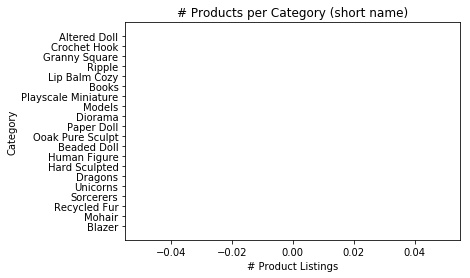

In [7]:
lists = sorted(category_short_count.items(), key=lambda z: z[1], reverse=False)
x, y = zip(*lists)

fig, ax = plt.subplots(1)
ax.barh(x[-20:],y[-20:])
ax.set_title('# Products per Category (short name)')
ax.set_xlabel('# Product Listings')
ax.set_ylabel('Category')
plt.show()

Generate plots showing distributions of product listings per category

In [ ]:
lists = sorted(category_long_count.items(), key=lambda z: z[1], reverse=False)
x, y = zip(*lists)

fig, ax = plt.subplots(1)
ax.barh(x[-20:],y[-20:])
ax.set_title('# Products per Category (long name)')
ax.set_xlabel('# Product Listings')
ax.set_ylabel('Category')
plt.show()

Generate plots showing distributions of product listings per category ID

In [ ]:
lists = sorted(category_id_count.items(), key=lambda z: z[1], reverse=False)
x, y = zip(*lists)
fig, ax = plt.subplots(1)
ax.barh(list(map(str,x[-20:])),y[-20:])
ax.set_title('# Products per Category (ID)')
ax.set_xlabel('# Product Listings')
ax.set_ylabel('Category')
plt.show()